# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Observations

# temperature vs. latitude has strong relationship across all cities combined in different hemispheres below.

# Visible correlation in the relationship between latitude and max temperature (F) in the northern and southern hemispheres. While you move towards northern hemisphere temperatures decreasing as you move away from the equator (increasing latitude), while the southern hemisphere shows a strong positive correlation with temperatures increasing as you move towards the equator (increasing latitude).

# There is a trend of higher humidity levels in a majority of cities in the northern hemisphere at this time regardless of distance from the equator, as compared to cities in the southern hemisphere.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# --- fahrenheit units ---
units = "imperial"

# --- build partial query url for API call for fahrenheit data ---
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# --- create empty lists to hold required data ---
city_name = []
Lats = []
Lngs = []
Temp = []
Maxtemps = []
Humidity = []
Cloudiness = []
Windspeed = []
Country = []
date = []

# --- initialize count variables for counting city and set ---
item = 1
batch = 1

# --- print initial header before displaying for loop  data ---
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # --- build query url with city name ---
    query_url = base_url + city
    
    # --- get the response as json ---
    data = requests.get(query_url).json()
     # --- retrieve required data into lists using exception handling ---
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        city_name.append(data["name"])
        Country.append(data["sys"]["country"])
        Lats.append(data["coord"]["lat"])
        Lngs.append(data["coord"]["lon"])    
        Temp.append(data["main"]["temp"])
        Maxtemps.append(data["main"]["temp_max"])
        Humidity.append(data["main"]["humidity"])
        Cloudiness.append(data["clouds"]["all"])
        Windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # --- increase item count by 1 ---
        item += 1
        
        # --- if statement to limit API calls to 50 using time.sleep (openweathermap API limits calls to 60/minute) ---
        if item > 50:
            # --- start a new set of items ---
            batch += 1
            
            # --- reset item count to 1 for next set ---
            item = 1
            
            # --- delay the execution to stay within the limits of the API query ---
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")

# --- print completion header after displaying for loop  data ---
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")
    
    
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | attawapiskat
City 'attawapiskat' not found. Skipping...
Processing Record 1 of Set 1 | santa rosalia
Processing Record 2 of Set 1 | kieta
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | puspokladany
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | wanaka
Processing Record 15 of Set 1 | naujamiestis
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | cicero dantas
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | zhigansk
Processing Record 20 of Set 1 | tigre
Processing Record 21 

Processing Record 20 of Set 4 | bokspits
City 'bokspits' not found. Skipping...
Processing Record 20 of Set 4 | geraldton
Processing Record 21 of Set 4 | seoul
Processing Record 22 of Set 4 | jinotega
Processing Record 23 of Set 4 | korla
Processing Record 24 of Set 4 | fortuna
Processing Record 25 of Set 4 | kerman
Processing Record 26 of Set 4 | angoche
Processing Record 27 of Set 4 | san carlos de bariloche
Processing Record 28 of Set 4 | yeppoon
Processing Record 29 of Set 4 | karauzyak
City 'karauzyak' not found. Skipping...
Processing Record 29 of Set 4 | kapit
Processing Record 30 of Set 4 | turtkul
City 'turtkul' not found. Skipping...
Processing Record 30 of Set 4 | portlethen
Processing Record 31 of Set 4 | high level
Processing Record 32 of Set 4 | tanout
Processing Record 33 of Set 4 | itaituba
Processing Record 34 of Set 4 | vytegra
Processing Record 35 of Set 4 | izhma
Processing Record 36 of Set 4 | nicoya
Processing Record 37 of Set 4 | smithers
Processing Record 38 of 

Processing Record 39 of Set 7 | bintulu
Processing Record 40 of Set 7 | kampong thum
Processing Record 41 of Set 7 | matagami
Processing Record 42 of Set 7 | manzil tamim
City 'manzil tamim' not found. Skipping...
Processing Record 42 of Set 7 | hami
Processing Record 43 of Set 7 | viedma
Processing Record 44 of Set 7 | ayr
Processing Record 45 of Set 7 | scottsburgh
City 'scottsburgh' not found. Skipping...
Processing Record 45 of Set 7 | belmonte
Processing Record 46 of Set 7 | mastic beach
Processing Record 47 of Set 7 | voi
Processing Record 48 of Set 7 | paoua
Processing Record 49 of Set 7 | maple creek
Processing Record 50 of Set 7 | la ronge
Processing Record 1 of Set 8 | constitucion
Processing Record 2 of Set 8 | andevoranto
City 'andevoranto' not found. Skipping...
Processing Record 2 of Set 8 | airai
Processing Record 3 of Set 8 | ntcheu
Processing Record 4 of Set 8 | srednekolymsk
Processing Record 5 of Set 8 | olga
Processing Record 6 of Set 8 | berasia
Processing Record 7

Processing Record 17 of Set 11 | rio gallegos
Processing Record 18 of Set 11 | vrangel
Processing Record 19 of Set 11 | karatau
Processing Record 20 of Set 11 | vila do maio
Processing Record 21 of Set 11 | ouallam
Processing Record 22 of Set 11 | opuwo
Processing Record 23 of Set 11 | palabuhanratu
City 'palabuhanratu' not found. Skipping...
Processing Record 23 of Set 11 | kondoa
Processing Record 24 of Set 11 | winslow
Processing Record 25 of Set 11 | rungata
City 'rungata' not found. Skipping...
Processing Record 25 of Set 11 | umtata
Processing Record 26 of Set 11 | labuhan
Processing Record 27 of Set 11 | taloqan
Processing Record 28 of Set 11 | banda aceh
Processing Record 29 of Set 11 | pascagoula
Processing Record 30 of Set 11 | hualmay
Processing Record 31 of Set 11 | saleaula
City 'saleaula' not found. Skipping...
Processing Record 31 of Set 11 | uvalde
Processing Record 32 of Set 11 | carutapera
Processing Record 33 of Set 11 | tsihombe
City 'tsihombe' not found. Skipping..

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# --- create a dataframe with retrieved data ---
cities_temps_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })

# --- convert unix timestamp under date column to date,time using pd.to_datetime ---
cities_temps_df["Date"] = pd.to_datetime(cities_temps_df["Date"], unit = "s")

# --- save the dataframe to .csv file ---
cities_temps_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)


In [13]:
# --- display the dataframe ---
cities_temps_df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Santa Rosalía,MX,2022-10-24 14:19:34,27.3167,-112.2833,63.68,75,3,9.89
1,Kieta,PG,2022-10-24 14:19:35,-6.2167,155.6333,79.56,84,65,0.27
2,Kavieng,PG,2022-10-24 14:19:35,-2.5744,150.7967,82.17,74,59,5.46
3,Mar del Plata,AR,2022-10-24 14:19:36,-38.0023,-57.5575,69.82,75,40,18.01
4,Ushuaia,AR,2022-10-24 14:19:36,-54.8000,-68.3000,46.02,65,75,11.50
...,...,...,...,...,...,...,...,...,...
547,Charters Towers,AU,2022-10-24 14:24:02,-20.1000,146.2667,77.22,77,28,12.59
548,Goba,ET,2022-10-24 14:24:03,7.0167,39.9833,56.14,87,80,2.91
549,Hargeisa,SO,2022-10-24 14:24:03,9.5600,44.0650,77.16,54,84,14.14
550,Krasnogorodskoye,RU,2022-10-24 14:24:05,56.8357,28.2822,44.22,74,51,0.56


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#There are no cities with humidity values over 100%, hence skipping this step.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

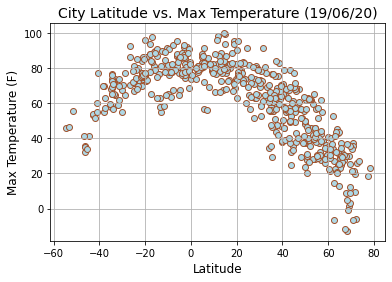

In [20]:
#create a scatter plot depicting latitude vs temperature ---

plt.scatter(latitudes, temperatures, marker="o", facecolors="lightblue", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

In [ ]:
#The scatterplot for Latitude vs. Temperature (F) above shows that the temperatures tend to be higher near the equator.

## Latitude vs. Humidity Plot

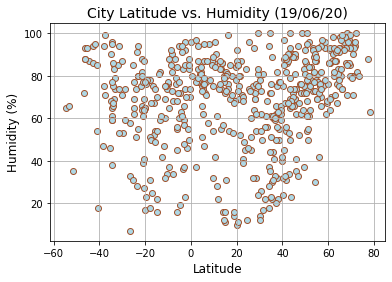

In [21]:
# --- create a scatter plot depicting latitude vs humidity ---
plt.scatter(latitudes, humidity, marker="o", facecolors="lightblue", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

In [ ]:
#The scatterplot for Humidity (%) vs. Latitude above does not appear to have much correlation. From the data points visualized, we can see that a large number of cities seem to have high humidity levels currently, with the majority being near the equator or in the northern hemisphere.

## Latitude vs. Cloudiness Plot

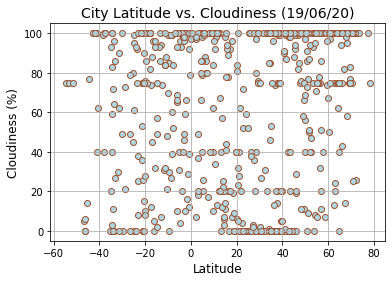

In [22]:
# --- create a scatter plot depicting latitude vs cloudiness ---
plt.scatter(latitudes, cloudiness, marker="o", facecolors="lightblue", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness (19/06/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

In [ ]:
# The scatterplot for Cloudiness (%) vs. Latitude above also does not appear to have much correlation, like humidity.

## Latitude vs. Wind Speed Plot

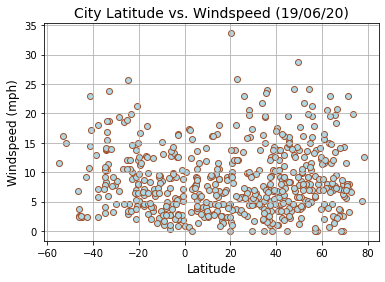

In [23]:
# Create a scatter plot depicting latitude vs wind speed
plt.scatter(latitudes, windspeed, marker="o", facecolors="lightblue", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Windspeed (19/06/20)", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()

In [ ]:
#The scatterplot for Wind Speed (mph) vs. Latitude again, does not show correlation, like humidity and cloudiness. It is observed that wind speeds are generally low at this time.

## Linear Regression

In [24]:
def plot_linear_regression(x, y, ax=None, **kwargs):
    
    # --- use the axes specified ---
    ax = ax
    
    # --- get linear regression values and store in variables ---
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = slope * x + intercept
    
    # --- create line equation ---
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                          
    # --- plot the linear model ---
    ax.plot(x, regress_values, color="firebrick")
    
    # --- return the plot and line equation created ---
    return ax, line_eq

In [ ]:
# --- find and store rows for Northern Hemisphere dataframe (greater than or equal to 0 degrees latitude) --- 
if humidity_over_100.empty == True:
    northern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0, :].copy().reset_index(drop=True)
    

# --- find and store rows for Southern Hemisphere dataframe (less than 0 degrees latitude) ---
if humidity_over_100.empty == True:
    southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)    

# --- extract relevant fields from both data frames for plotting ---
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (F)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (F)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.7202109604618625


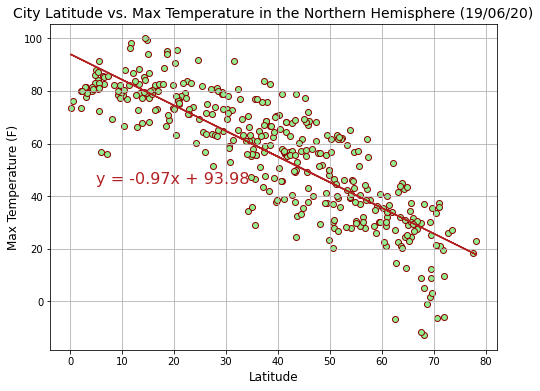

In [29]:

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="lightgreen", edgecolors="darkred")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,45),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-temp-linreg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.4792878615068619


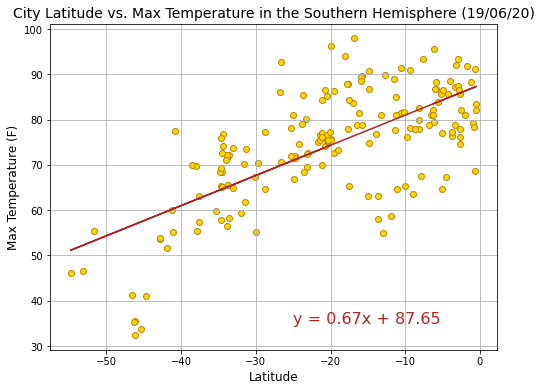

In [30]:

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-25, 35),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-temp-linreg.png")
plt.show()

In [ ]:
#Both scatter plots show a strong correlation between max temperature (F) and latitude, with the northern hemisphere displaying a negative correlation and the southern hemisphere being positive.

#Looking at this pair of plots, it is apparent that temperatures are higher as you near the equator (0 degrees latitude). In the northern hemisphere, we see temperature falling as latitude increases, and in the southern hemisphere, temperatures increase while latitude increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.063220852480489


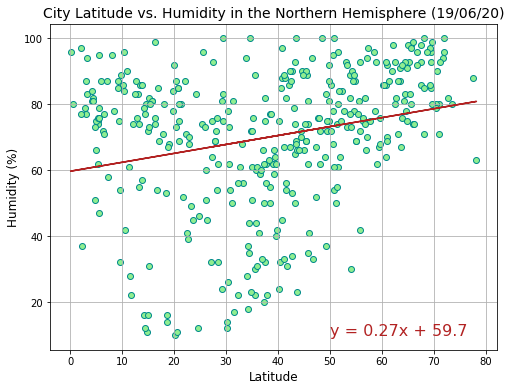

In [33]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_humidity, marker="o", facecolors="lightgreen", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(50,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-humidity-linreg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.017493286201089288


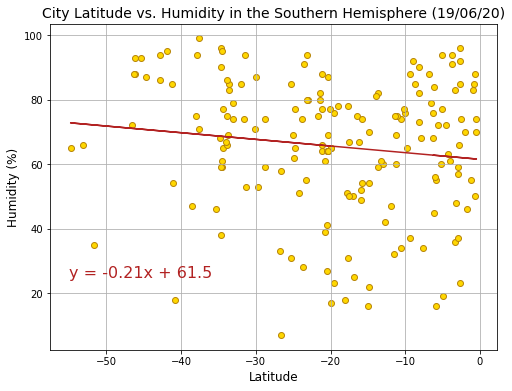

In [34]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-humidity-linreg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.05246762094474704


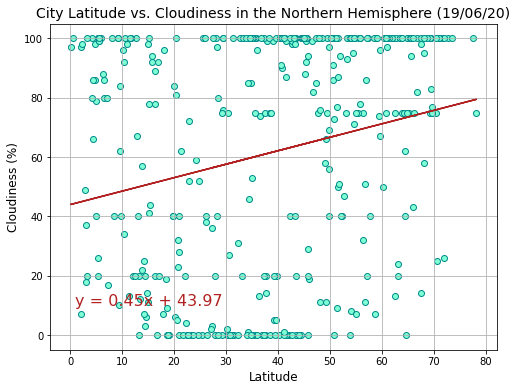

In [35]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(1,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.025129018453155107


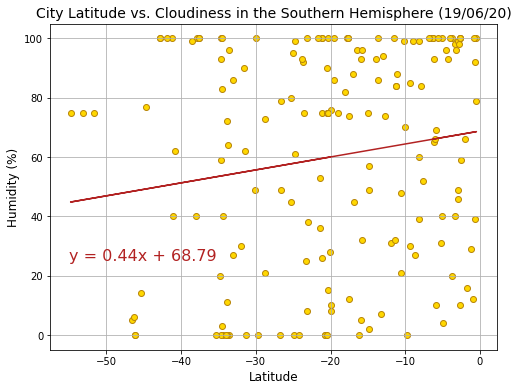

In [36]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.016168500888231133


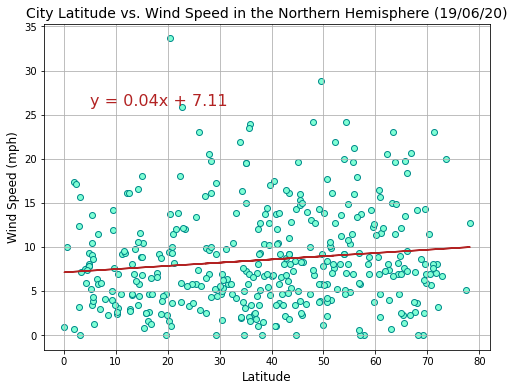

In [37]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,26),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-windspeed-linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.0812799721953694


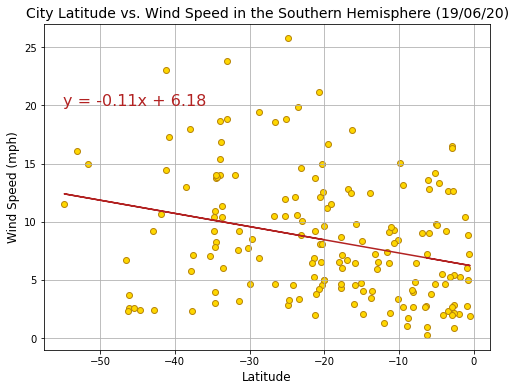

In [38]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 20),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-windspeed-linreg.png")
plt.show()

In [ ]:
#Appears to be there is no correlation between wind speed and latitude in both the northern and southern hemispheres.